In [1]:
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy import units as u
from glob import glob
import numpy as np
from astropy.io import fits
# from photutils import CircularAperture, aperture_photometry
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter
import os

ELOs = [500, 2000, 500]
EHIs = [2000, 8000, 8000]

e_idx = 0
rootpath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/alldata/figs/comb_fits_final_img'
datdirs = glob(f'{rootpath}/SDSSTG10094')
regf = pd.read_csv(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/alldata/fk5_regs/all_centers.csv')


directory = datdirs[0]
DATFILE = f'{directory}/final_img/mos1S001-fovimsky-{ELOs[e_idx]}-{EHIs[e_idx]}.fits'
EXPFILE = f'{directory}/final_img/mos1S001-expimsky-{ELOs[e_idx]}-{EHIs[e_idx]}.fits'
NXBFILE = f'{directory}/final_img/mos1S001-bkgimsky-{ELOs[e_idx]}-{EHIs[e_idx]}.fits'
SHOFILE = f'{directory}/final_img/mos1S001-fovimsky-{ELOs[e_idx]}-{EHIs[e_idx]}.fits'
CHEESEFILE = f'{directory}/final_img/mos1S001-cheeset.fits'

RA=regf[regf['ID']==os.path.basename(directory)]['RA']
DEC=regf[regf['ID']==os.path.basename(directory)]['DEC']

In [48]:
x,y = np.meshgrid(range(0,900),range(0,900))

In [49]:
print(x,y)

[[  0   1   2 ... 897 898 899]
 [  0   1   2 ... 897 898 899]
 [  0   1   2 ... 897 898 899]
 ...
 [  0   1   2 ... 897 898 899]
 [  0   1   2 ... 897 898 899]
 [  0   1   2 ... 897 898 899]] [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [897 897 897 ... 897 897 897]
 [898 898 898 ... 898 898 898]
 [899 899 899 ... 899 899 899]]


In [34]:
from astropy.wcs import WCS
wcs = WCS(fits.getheader(DATFILE))
# dir(wcs)
ra,dec = wcs.pixel_to_world_values(x,y)

distance = SkyCoord(ra=ra,dec=dec,unit='deg').separation(SkyCoord(ra=RA,dec=DEC,unit='deg')).arcmin
# plt.imshow(distance)

cts_map = fits.getdata(DATFILE)*fits.getdata(CHEESEFILE)
bkg_map = fits.getdata(NXBFILE)*fits.getdata(CHEESEFILE)
exp_map = fits.getdata(EXPFILE)*fits.getdata(CHEESEFILE)
msk_map = fits.getdata(CHEESEFILE)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 59731.000833 from DATE-END'. [astropy.wcs.wcs]


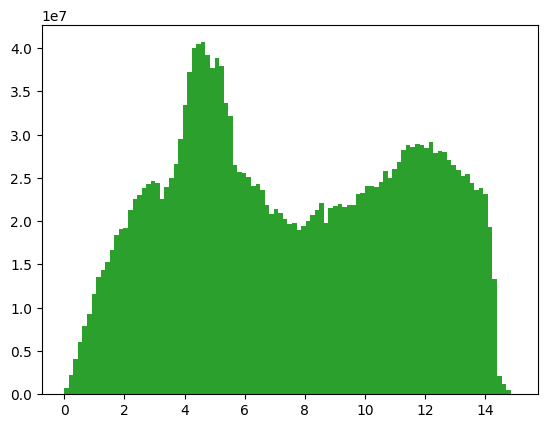

In [35]:
results = plt.hist(distance.flatten(),weights=cts_map.flatten(),bins=np.linspace(0,15,100))
CTS = results[0]
r_bins = results[1]

results = plt.hist(distance.flatten(),weights=bkg_map.flatten(),bins=np.linspace(0,15,100))
BKG = results[0]
r_bins = results[1]

results = plt.hist(distance.flatten(),weights=exp_map.flatten(),bins=np.linspace(0,15,100))
EXP = results[0]
r_bins = results[1]

results = plt.hist(distance.flatten(),weights=msk_map.flatten(),bins=np.linspace(0,15,100))
Npixel = results[0]
r_bins = results[1]

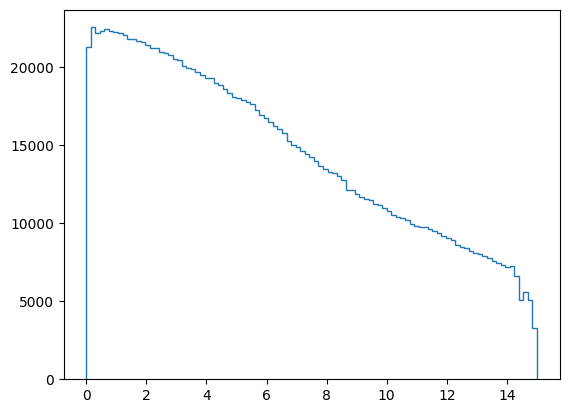

In [36]:
plt.stairs(EXP/Npixel,r_bins)


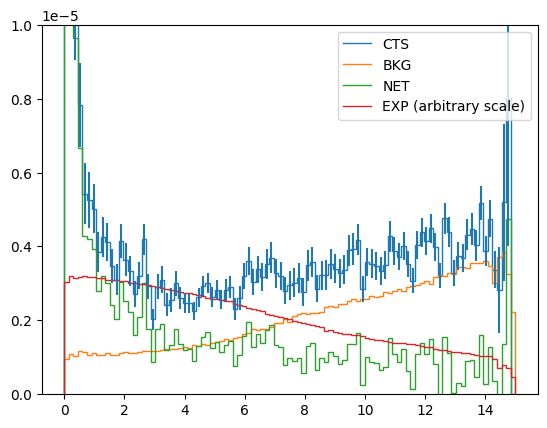

In [40]:
plt.stairs(CTS/EXP,r_bins,label='CTS')
plt.stairs(BKG/EXP,r_bins,label='BKG')
plt.stairs(CTS/EXP-BKG/EXP,r_bins,label='NET')

plt.stairs(EXP/Npixel/EXP[0]*1e-4,r_bins,label='EXP (arbitrary scale)')


plt.errorbar(x=np.sqrt(r_bins[:-1]*r_bins[1:]),y=CTS/EXP,yerr=np.sqrt(CTS)/EXP,fmt='none')

plt.ylim([0,1e-5])
plt.legend()